In [2]:
import pickle
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as ss
import matplotlib.style as style
style.use('ggplot')

In [3]:
host = 'SYNPAI' #'habanero'
if host == 'habanero':
    resultdir ='/rigel/issa/users/Tahereh/Results/'
    neuraldir = '/rigel/issa/users/Tahereh/models/neural_features/'
    modeldir = '/rigel/issa/users/Tahereh/models/'
    datadir = '/rigel/issa/users/Tahereh/Data/DiCarlo/'
elif host =='Mac':
    resultdir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/'
    neuraldir = '/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/neural_features/'
    modeldir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/'
    datadir = '/Users/Tahereh/Documents/Data/DiCarlo'
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Neural-Dynamics/'
    neuralfeaturesdir = '/home/tahereh/Documents/Research/features/neural_features/'
    modeldir =  '/home/tahereh/Documents/Research/features/'
    datadir =  '/home/tahereh/Documents/Research/Data/DiCarlo/'
    # %pylab inline
    # pylab.rcParams['xtick.color'] = 'white'
    # pylab.rcParams['ytick.color'] = 'white'
    # # pylab.rcParams['figsize'] = [6,4]
    

In [4]:
import MappingV36
from MappingV36 import MappingV36 as Mapping
from ReadMeta import ReadMeta
from ReadData import ReadData
from ReadModel import ReadModel

import pickle
import h5py
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import importlib
Mapping = Mapping()



/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
reg_methods

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in sqrt


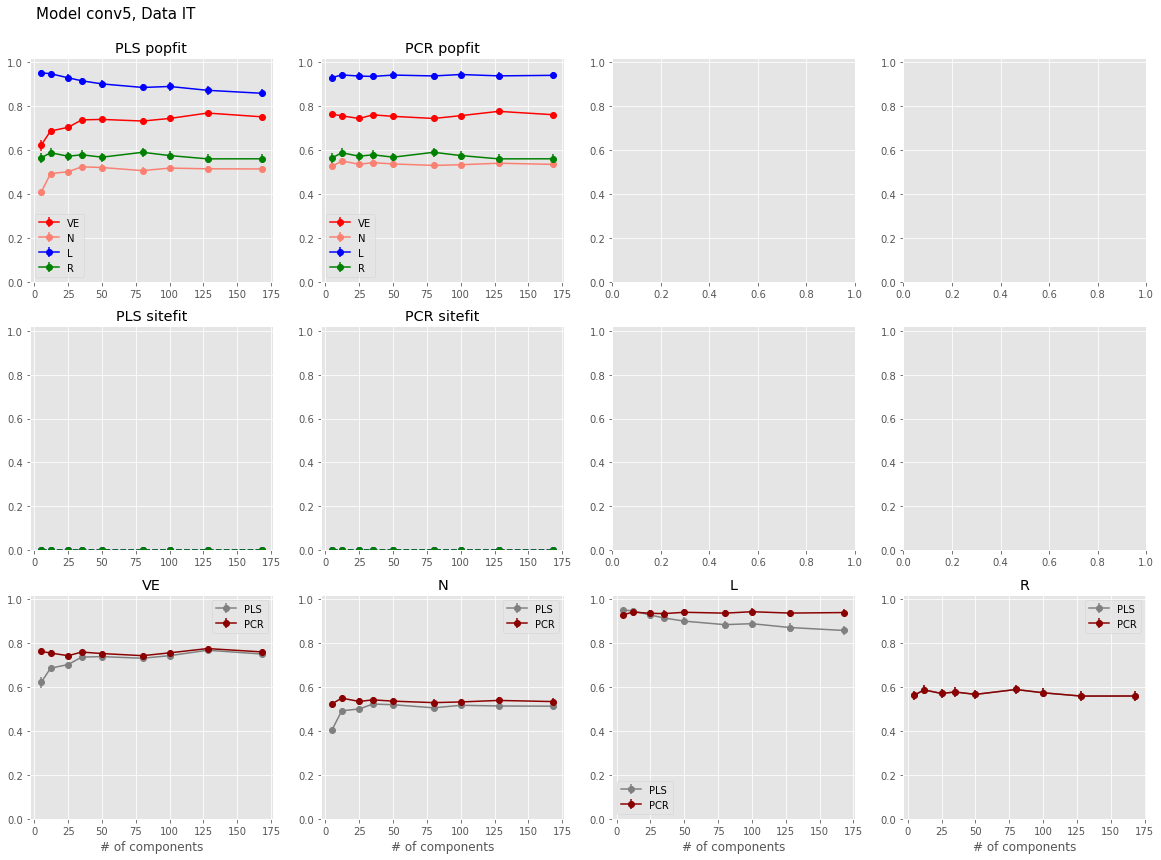

In [12]:
import scipy.stats as ss
data_unit_indices = range(168)
purpose_of_this_run = 'sweepPLSridgesitefit_%dsites' % len(data_unit_indices) #'3regswithridgesitefits_168sites'

ni = 5120
nf = 168
nt = 46
reg_methods = ['PLS', 'ridge']
n_components_range = [5, 12, 25, 35, 50,80,100,128, 168]#np.arange(nf,1,-1)

VEarraysite = np.zeros((len(n_components_range), len(reg_methods)))
Narraysite = np.zeros_like(VEarraysite)
Larraysite = np.zeros_like(VEarraysite)
Rarraysite = np.zeros_like(VEarraysite)

VEarraypop = np.zeros_like(VEarraysite)
Narraypop = np.zeros_like(VEarraysite)
Larraypop = np.zeros_like(VEarraysite)
Rarraypop = np.zeros_like(VEarraysite)

VEarraypopStd = np.zeros_like(VEarraysite)
NarraypopStd = np.zeros_like(VEarraysite)
LarraypopStd = np.zeros_like(VEarraysite)
RarraypopStd = np.zeros_like(VEarraysite)

VEarraysiteStd = np.zeros_like(VEarraysite)
NarraysiteStd = np.zeros_like(VEarraysite)
LarraysiteStd = np.zeros_like(VEarraysite)
RarraysiteStd = np.zeros_like(VEarraysite)


for inc, nc in enumerate(n_components_range):
    trainfraci = 0.8  # image trainfrac
    splitfract = 0.5  # trial splitfrac
    nfoldi = 2
    nfoldt = 2
    
    spearman_brown = False
    
    reg_params_list = [nc, [20, -10, 10]]
    report_popfit = [True, True]  # [False, True, True]
    report_sitefit = [False, False]  # [True, True, True]
    PCA_ncomponents_list = [ -1,  nc]

    # file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collilnearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    #     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')
    
    # file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s_statsfromHvM%s_%dcmp.pickle' % (
    #     reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map,stats_from_data, nc), 'rb')
    
    file = open(resultdir + 'MappingMtoD_%s_%s_%s, ni%d_nf%d_nt%d_SB%s_%dcmp_%s.pickle' % (
              reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt,  spearman_brown, nc, purpose_of_this_run), 'rb')

    
    data_list = pickle.load(file)
    file.close()
    r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
    
    for ir, r in enumerate(reg_methods):
        
        VEpop = np.nanmedian(r12_reg[:,ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]))
        Npop = np.median(r12_reg[:, ir])
        Lpop = np.median(r11_reg[:, ir])
        Rpop = np.median(r22_reg[:, ir])
        
        VEarraypop[inc, ir] = VEpop
        Narraypop[inc, ir] = Npop
        Larraypop[inc, ir] = Lpop
        Rarraypop[inc, ir] = Rpop
        
        VEarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]), axis=None)
        NarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir], axis=None)
        LarraypopStd[inc, ir] = ss.sem(r11_reg[:, ir], axis=None)
        RarraypopStd[inc, ir] = ss.sem(r22_reg[:, ir], axis=None)
        
        VEsite = np.nanmedian(r12_reg_sitfit[:,ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]))
        Nsite = np.median(r12_reg_sitfit[:, ir])
        Lsite = np.median(r11_reg_sitfit[:, ir])
        Rsite = np.median(r22_reg_sitfit[:, ir])
        
        VEarraysite[inc, ir] = VEsite
        Narraysite[inc, ir] = Nsite
        Larraysite[inc, ir] = Lsite
        Rarraysite[inc, ir] = Rsite
        
        VEarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]), axis=None)
        NarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir], axis=None)
        LarraysiteStd[inc, ir] = ss.sem(r11_reg_sitfit[:, ir], axis=None)
        RarraysiteStd[inc, ir] = ss.sem(r22_reg_sitfit[:, ir], axis=None)


# Plot figures


reg_methods_labels = ['PLS','PCR']
colors = ['gray','DarkRed']            
n_regs = len(reg_methods)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=[20, 14])

for iax, ax in enumerate(np.ravel(axes).tolist()):
    ax.set_ylim([-0.0, 1.02])


for iax, ax in enumerate(axes[0,:len(reg_methods)].tolist()):
    
    ax.errorbar(n_components_range, VEarraypop[:,iax], yerr=VEarraypopStd[:,iax], marker='o', color='r', label='VE')
    ax.errorbar(n_components_range, Narraypop[:,iax], yerr=NarraypopStd[:,iax], marker='o', color='salmon', label='N')
    ax.errorbar(n_components_range, Larraypop[:,iax], yerr=LarraypopStd[:,iax], marker='o', color='b', label='L')
    ax.errorbar(n_components_range, Rarraypop[:,iax], yerr=RarraypopStd[:,iax], marker='o', color='g', label='R')
    ax.set_title(reg_methods_labels[iax]+ ' popfit')

for iax, ax in enumerate(axes[1, :len(reg_methods)].tolist()):
    
    ax.errorbar(n_components_range, VEarraysite[:,iax], yerr=VEarraysiteStd[:,iax], marker='o', color='r', ls='--', label='VE')
    ax.errorbar(n_components_range, Narraysite[:,iax], yerr=NarraysiteStd[:,iax], marker='o', color='salmon', ls='--', label='N')
    ax.errorbar(n_components_range, Larraysite[:,iax], yerr=LarraysiteStd[:,iax], marker='o', color='b', ls='--', label='L')
    ax.errorbar(n_components_range, Rarraysite[:,iax], yerr=RarraysiteStd[:,iax], marker='o', color='g', ls='--', label='R')
    ax.set_title(reg_methods_labels[iax] + ' sitefit')
    # ax.set_xlabel('ni/nf')

axes[0,0].legend()
axes[0,1].legend()

#         
axes[2,0].set_title('VE')

#[axes[2,0].errorbar(n_components_range, VEarraysite[itrace, :], yerr=VEarraysiteStd[itrace, :], marker='o', ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]
if nc == 2:
    axes[2,0].legend()
[axes[2,0].errorbar(n_components_range, VEarraypop[:, itrace], yerr=VEarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[2,1].set_title('N')

#[axes[2,1].errorbar(n_components_range, Narraysite[itrace, :], yerr= NarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,1].errorbar(n_components_range, Narraypop[:, itrace], yerr=NarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]


axes[2,2].set_title('L')

#[axes[2,2].errorbar(n_components_range, Larraysite[itrace, :], yerr=LarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,2].errorbar(n_components_range, Larraypop[:, itrace], yerr=LarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[2,3].set_title('R')

#[axes[2,3].errorbar(n_components_range, Rarraysite[itrace, :], yerr=RarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,3].errorbar(n_components_range, Rarraypop[:, itrace], yerr=RarraypopStd[:, itrace],  marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

[ax.set_xlabel('# of components') for ax in axes[2, :]]
[ax.legend() for ax in axes[2, :]]


title = 'Model %s, Data %s'%('conv5', 'IT' )
axes[0,0].text(1,1.2, title, fontsize=15)

fig.savefig(resultdir+'MappingMtoD_SweepNumComponents_%s_%s_SB%s_%s.png'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)
fig.savefig(resultdir+'MappingMtoD_SweepNumComponents_%s_%s_SB%s_%s.pdf'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)


/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in sqrt


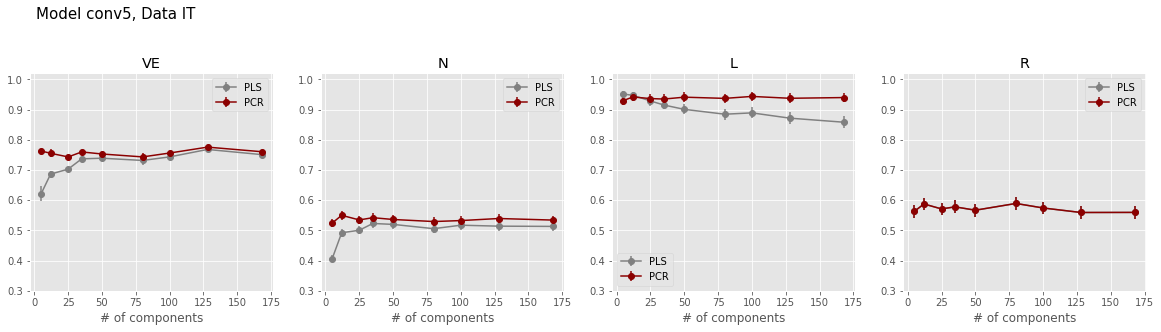

In [19]:
import scipy.stats as ss
data_unit_indices = range(168)
purpose_of_this_run = 'sweepPLSridgesitefit_%dsites' % len(data_unit_indices) #'3regswithridgesitefits_168sites'

ni = 5120
nf = 168
nt = 46
reg_methods = ['PLS', 'ridge']
n_components_range = [5, 12, 25, 35, 50,80,100,128, 168]#np.arange(nf,1,-1)

VEarraysite = np.zeros((len(n_components_range), len(reg_methods)))
Narraysite = np.zeros_like(VEarraysite)
Larraysite = np.zeros_like(VEarraysite)
Rarraysite = np.zeros_like(VEarraysite)

VEarraypop = np.zeros_like(VEarraysite)
Narraypop = np.zeros_like(VEarraysite)
Larraypop = np.zeros_like(VEarraysite)
Rarraypop = np.zeros_like(VEarraysite)

VEarraypopStd = np.zeros_like(VEarraysite)
NarraypopStd = np.zeros_like(VEarraysite)
LarraypopStd = np.zeros_like(VEarraysite)
RarraypopStd = np.zeros_like(VEarraysite)

VEarraysiteStd = np.zeros_like(VEarraysite)
NarraysiteStd = np.zeros_like(VEarraysite)
LarraysiteStd = np.zeros_like(VEarraysite)
RarraysiteStd = np.zeros_like(VEarraysite)


for inc, nc in enumerate(n_components_range):
    trainfraci = 0.8  # image trainfrac
    splitfract = 0.5  # trial splitfrac
    nfoldi = 2
    nfoldt = 2
    
    spearman_brown = False
    
    reg_params_list = [nc, [20, -10, 10]]
    report_popfit = [True, True]  # [False, True, True]
    report_sitefit = [False, False]  # [True, True, True]
    PCA_ncomponents_list = [ -1,  nc]

    # file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collilnearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    #     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')
    
    # file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s_statsfromHvM%s_%dcmp.pickle' % (
    #     reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map,stats_from_data, nc), 'rb')
    
    file = open(resultdir + 'MappingMtoD_%s_%s_%s, ni%d_nf%d_nt%d_SB%s_%dcmp_%s.pickle' % (
              reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt,  spearman_brown, nc, purpose_of_this_run), 'rb')

    
    data_list = pickle.load(file)
    file.close()
    r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
    
    for ir, r in enumerate(reg_methods):
        
        VEpop = np.nanmedian(r12_reg[:,ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]))
        Npop = np.median(r12_reg[:, ir])
        Lpop = np.median(r11_reg[:, ir])
        Rpop = np.median(r22_reg[:, ir])
        
        VEarraypop[inc, ir] = VEpop
        Narraypop[inc, ir] = Npop
        Larraypop[inc, ir] = Lpop
        Rarraypop[inc, ir] = Rpop
        
        VEarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]), axis=None)
        NarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir], axis=None)
        LarraypopStd[inc, ir] = ss.sem(r11_reg[:, ir], axis=None)
        RarraypopStd[inc, ir] = ss.sem(r22_reg[:, ir], axis=None)
        
        VEsite = np.nanmedian(r12_reg_sitfit[:,ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]))
        Nsite = np.median(r12_reg_sitfit[:, ir])
        Lsite = np.median(r11_reg_sitfit[:, ir])
        Rsite = np.median(r22_reg_sitfit[:, ir])
        
        VEarraysite[inc, ir] = VEsite
        Narraysite[inc, ir] = Nsite
        Larraysite[inc, ir] = Lsite
        Rarraysite[inc, ir] = Rsite
        
        VEarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]), axis=None)
        NarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir], axis=None)
        LarraysiteStd[inc, ir] = ss.sem(r11_reg_sitfit[:, ir], axis=None)
        RarraysiteStd[inc, ir] = ss.sem(r22_reg_sitfit[:, ir], axis=None)


# Plot figures


reg_methods_labels = ['PLS','PCR']
colors = ['gray','DarkRed']            
n_regs = len(reg_methods)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[20, 4])

for iax, ax in enumerate(np.ravel(axes).tolist()):
    ax.set_ylim([0.3, 1.02])

#         
axes[0].set_title('VE')

#[axes[0].errorbar(n_components_range, VEarraysite[itrace, :], yerr=VEarraysiteStd[itrace, :], marker='o', ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]
if nc == 2:
    axes[0].legend()
[axes[0].errorbar(n_components_range, VEarraypop[:, itrace], yerr=VEarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[1].set_title('N')

#[axes[2,1].errorbar(n_components_range, Narraysite[itrace, :], yerr= NarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[1].errorbar(n_components_range, Narraypop[:, itrace], yerr=NarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]


axes[2].set_title('L')

#[axes[2,2].errorbar(n_components_range, Larraysite[itrace, :], yerr=LarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2].errorbar(n_components_range, Larraypop[:, itrace], yerr=LarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[3].set_title('R')

#[axes[2,3].errorbar(n_components_range, Rarraysite[itrace, :], yerr=RarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[3].errorbar(n_components_range, Rarraypop[:, itrace], yerr=RarraypopStd[:, itrace],  marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

[ax.set_xlabel('# of components') for ax in axes[ :]]
[ax.legend() for ax in axes[ :]]


title = 'Model %s, Data %s'%('conv5', 'IT' )
axes[0].text(1,1.2, title, fontsize=15)

fig.savefig(resultdir+'MappingMtoD_summary_SweepNumComponents_%s_%s_SB%s_%s.png'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)
fig.savefig(resultdir+'MappingMtoD_summary_SweepNumComponents_%s_%s_SB%s_%s.pdf'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)


In [20]:
0.5/(0.95*0.6)**0.5

0.6622661785325219

/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in sqrt
/home/tahereh/anaconda3/envs/pytorch_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in sqrt


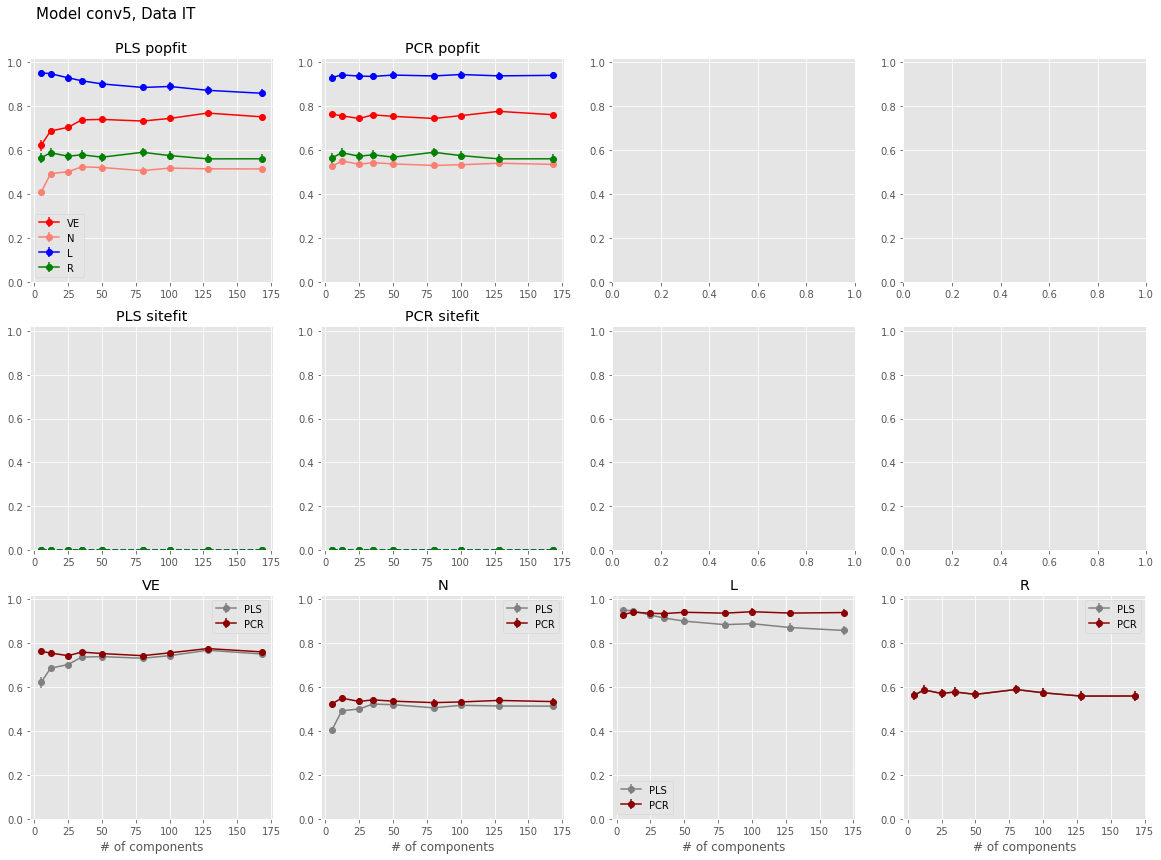

In [11]:
import scipy.stats as ss
data_unit_indices = range(168)
purpose_of_this_run = 'sweepPLSridgesitefit_%dsites' % len(data_unit_indices) #'3regswithridgesitefits_168sites'

ni = 5120
nf = 168
nt = 46
reg_methods = ['PLS', 'ridge']
n_components_range = [5, 12, 25, 35, 50,80,100,128, 168]#np.arange(nf,1,-1)

VEarraysite = np.zeros((len(n_components_range), len(reg_methods)))
Narraysite = np.zeros_like(VEarraysite)
Larraysite = np.zeros_like(VEarraysite)
Rarraysite = np.zeros_like(VEarraysite)

VEarraypop = np.zeros_like(VEarraysite)
Narraypop = np.zeros_like(VEarraysite)
Larraypop = np.zeros_like(VEarraysite)
Rarraypop = np.zeros_like(VEarraysite)

VEarraypopStd = np.zeros_like(VEarraysite)
NarraypopStd = np.zeros_like(VEarraysite)
LarraypopStd = np.zeros_like(VEarraysite)
RarraypopStd = np.zeros_like(VEarraysite)

VEarraysiteStd = np.zeros_like(VEarraysite)
NarraysiteStd = np.zeros_like(VEarraysite)
LarraysiteStd = np.zeros_like(VEarraysite)
RarraysiteStd = np.zeros_like(VEarraysite)


for inc, nc in enumerate(n_components_range):
    trainfraci = 0.8  # image trainfrac
    splitfract = 0.5  # trial splitfrac
    nfoldi = 2
    nfoldt = 2
    
    spearman_brown = False
    
    reg_params_list = [nc, [20, -10, 10]]
    report_popfit = [True, True]  # [False, True, True]
    report_sitefit = [False, False]  # [True, True, True]
    PCA_ncomponents_list = [ -1,  nc]

    # file = open(resultdir+'unit_test_%s_ni%d_nf%d_nt%d_collilnearity%s_%s_SB%s_VariousSd%s_noisymap%s.pickle' % (
    #     reg_methods, ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map), 'rb')
    
    # file = open(resultdir+'unit_test_%s_%s_%s, ni%d_nf%d_nt%d_collinearity%s_%s_SB%s_VariousSd%s_noisymap%s_statsfromHvM%s_%dcmp.pickle' % (
    #     reg_methods, reg_params_list, PCA_ncomponents_list , ni, nf, nt, Collinearity, noise_dist, spearman_brown, various_unit_stds, noisy_map,stats_from_data, nc), 'rb')
    
    file = open(resultdir + 'MappingMtoD_%s_%s_%s, ni%d_nf%d_nt%d_SB%s_%dcmp_%s.pickle' % (
              reg_methods, reg_params_list, PCA_ncomponents_list, ni, nf, nt,  spearman_brown, nc, purpose_of_this_run), 'rb')

    
    data_list = pickle.load(file)
    file.close()
    r12_reg,r11_reg,r22_reg,r12_reg_sitfit,r11_reg_sitfit,r22_reg_sitfit = data_list
    
    for ir, r in enumerate(reg_methods):
        
        VEpop = np.nanmedian(r12_reg[:,ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]))
        Npop = np.median(r12_reg[:, ir])
        Lpop = np.median(r11_reg[:, ir])
        Rpop = np.median(r22_reg[:, ir])
        
        VEarraypop[inc, ir] = VEpop
        Narraypop[inc, ir] = Npop
        Larraypop[inc, ir] = Lpop
        Rarraypop[inc, ir] = Rpop
        
        VEarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir]/np.sqrt(r11_reg[:, ir]*r22_reg[:, ir]), axis=None)
        NarraypopStd[inc, ir] = ss.sem(r12_reg[:, ir], axis=None)
        LarraypopStd[inc, ir] = ss.sem(r11_reg[:, ir], axis=None)
        RarraypopStd[inc, ir] = ss.sem(r22_reg[:, ir], axis=None)
        
        VEsite = np.nanmedian(r12_reg_sitfit[:,ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]))
        Nsite = np.median(r12_reg_sitfit[:, ir])
        Lsite = np.median(r11_reg_sitfit[:, ir])
        Rsite = np.median(r22_reg_sitfit[:, ir])
        
        VEarraysite[inc, ir] = VEsite
        Narraysite[inc, ir] = Nsite
        Larraysite[inc, ir] = Lsite
        Rarraysite[inc, ir] = Rsite
        
        VEarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir]/np.sqrt(r11_reg_sitfit[:, ir]*r22_reg_sitfit[:, ir]), axis=None)
        NarraysiteStd[inc, ir] = ss.sem(r12_reg_sitfit[:, ir], axis=None)
        LarraysiteStd[inc, ir] = ss.sem(r11_reg_sitfit[:, ir], axis=None)
        RarraysiteStd[inc, ir] = ss.sem(r22_reg_sitfit[:, ir], axis=None)


# Plot figures


reg_methods_labels = ['PLS','PCR']
colors = ['gray','DarkRed']            
n_regs = len(reg_methods)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=[20, 14])

for iax, ax in enumerate(np.ravel(axes).tolist()):
    ax.set_ylim([-0.0, 1.02])


for iax, ax in enumerate(axes[0,:len(reg_methods)].tolist()):
    
    ax.errorbar(n_components_range, VEarraypop[:,iax], yerr=VEarraypopStd[:,iax], marker='o', color='r', label='VE')
    ax.errorbar(n_components_range, Narraypop[:,iax], yerr=NarraypopStd[:,iax], marker='o', color='salmon', label='N')
    ax.errorbar(n_components_range, Larraypop[:,iax], yerr=LarraypopStd[:,iax], marker='o', color='b', label='L')
    ax.errorbar(n_components_range, Rarraypop[:,iax], yerr=RarraypopStd[:,iax], marker='o', color='g', label='R')
    ax.set_title(reg_methods_labels[iax]+ ' popfit')

for iax, ax in enumerate(axes[1, :len(reg_methods)].tolist()):
    
    ax.errorbar(n_components_range, VEarraysite[:,iax], yerr=VEarraysiteStd[:,iax], marker='o', color='r', ls='--', label='VE')
    ax.errorbar(n_components_range, Narraysite[:,iax], yerr=NarraysiteStd[:,iax], marker='o', color='salmon', ls='--', label='N')
    ax.errorbar(n_components_range, Larraysite[:,iax], yerr=LarraysiteStd[:,iax], marker='o', color='b', ls='--', label='L')
    ax.errorbar(n_components_range, Rarraysite[:,iax], yerr=RarraysiteStd[:,iax], marker='o', color='g', ls='--', label='R')
    ax.set_title(reg_methods_labels[iax] + ' sitefit')
    # ax.set_xlabel('ni/nf')

axes[0,0].legend()

#         
axes[2,0].set_title('VE')

#[axes[2,0].errorbar(n_components_range, VEarraysite[itrace, :], yerr=VEarraysiteStd[itrace, :], marker='o', ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]
if nc == 2:
    axes[2,0].legend()
[axes[2,0].errorbar(n_components_range, VEarraypop[:, itrace], yerr=VEarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[2,1].set_title('N')

#[axes[2,1].errorbar(n_components_range, Narraysite[itrace, :], yerr= NarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,1].errorbar(n_components_range, Narraypop[:, itrace], yerr=NarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]


axes[2,2].set_title('L')

#[axes[2,2].errorbar(n_components_range, Larraysite[itrace, :], yerr=LarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,2].errorbar(n_components_range, Larraypop[:, itrace], yerr=LarraypopStd[:, itrace], marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

axes[2,3].set_title('R')

#[axes[2,3].errorbar(n_components_range, Rarraysite[itrace, :], yerr=RarraysiteStd[itrace, :], marker='o',ls='--', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in [1]]

[axes[2,3].errorbar(n_components_range, Rarraypop[:, itrace], yerr=RarraypopStd[:, itrace],  marker='o', color=colors[itrace], label=reg_methods_labels[itrace]) for itrace in range(n_regs)]

[ax.set_xlabel('# of components') for ax in axes[2, :]]
[ax.legend() for ax in axes[2, :]]


title = 'Model %s, Data %s'%('conv5', 'IT' )
axes[0,0].text(1,1.2, title, fontsize=15)

fig.savefig(resultdir+'MappingMtoD_SweepNumComponents_%s_%s_SB%s_%s.png'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)
fig.savefig(resultdir+'MappingMtoD_SweepNumComponents_%s_%s_SB%s_%s.pdf'%(reg_methods, reg_params_list, spearman_brown, purpose_of_this_run), dpi=300)


In [25]:
VEarraysite[1,:]

array([       nan, 0.74400448,        nan])

In [16]:
   

importlib.reload(MappingV36)
from MappingV36 import MappingV36 as Mapping
Mapping = Mapping()
get_consistency = Mapping.get_consistency
r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1 = get_consistency(reg_method, reg_params,  model1,inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)


datalist = [r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1, flexible_times, time_interval_fixed, reg_method, reg_params]
filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer1
pickle.dump(datalist, open(filename, 'wb'))
print('Model1 done')

# r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2 = get_consistency(reg_method, reg_params, model2, inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)
# print('Model2 done')
# 
# 
# datalist = [r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2, flexible_times, time_interval_fixed, reg_method, reg_params]
# filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer2
# pickle.dump(datalist, open(filename, 'wb'))

NameError: name 'reg_method' is not defined

In [17]:
r2XAB = (r2AX +r2BX -2*np.sqrt(r2AX)*np.sqrt(r2BX)*rAB)/(1-np.square(rAB))

NameError: name 'r2AX' is not defined